In [1]:
from __future__ import print_function

# Introduction
For this project I will attempt to create a prediction algorithom using the Random Forest method to predict the sale price of a group of homes in a test set of data. For this excersize I will use two separate sets of data. One that I wil use to train the model which contains the price of the final sale of the homes, and one that does not have the final sale price.   

In [2]:
#Import needed functions into the notebook 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO
import os
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as stats

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
#Read in the train data 
DATA_DIR = os.path.join("..","lol_project_home_pricing", "data")
DATA_DIR = os.path.abspath(DATA_DIR)

In [4]:
#Read in train data 
house_data  = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))


house_data_features = house_data.columns.get_values()
house_data_features = house_data_features.tolist()
#taking a look at what the features I'm working with 
print (house_data_features)


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
#Take a look at the shape of the data 
house_data.shape

(1460, 81)

In [12]:
#Taking a look at the arrangement of the data I will want to rearrange the features by data type to engineer them
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [10]:
#reorder the df so that the data types are cleanly organized 
house_mask = pd.DataFrame(house_data.dtypes)
house_mask = house_mask.reset_index()
house_mask.columns = ['Col', 'dat_ty']
house_mask = house_mask.sort_values(['dat_ty'], ascending=[1])
house_data_columns = house_mask.Col.tolist()

In [ ]:
house_data.SalePrice.mean()

In [14]:
house_data = house_data[house_data_columns]
house_data.head()

,Id,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition2,KitchenQual,ExterCond,CentralAir,HeatingQC
0,1,150,856,856,854,0,1710,1,0,2,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex
1,2,284,1262,1262,0,0,1262,0,1,2,...,MetalSd,CompShg,Gable,1Story,1Fam,Norm,TA,TA,Y,Ex
2,3,434,920,920,866,0,1786,1,0,2,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex
3,4,540,756,961,756,0,1717,1,0,1,...,Wd Sdng,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Gd
4,5,490,1145,1145,1053,0,2198,1,0,2,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex


In [17]:
# use this as a check to make sure the data reorganized
#house_data.dtypes

In [20]:
# Replace all the missing categorical data with "missing" creating an additional factor for the model. 
house_data_category_filled = house_data[house_data_columns[38:]].fillna("missing")
house_data_category_filled.head()

,Foundation,GarageFinish,LandSlope,LotConfig,GarageQual,GarageCond,LandContour,Utilities,GarageType,LotShape,...,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition2,KitchenQual,ExterCond,CentralAir,HeatingQC
0,PConc,RFn,Gtl,Inside,TA,TA,Lvl,AllPub,Attchd,Reg,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex
1,CBlock,RFn,Gtl,FR2,TA,TA,Lvl,AllPub,Attchd,Reg,...,MetalSd,CompShg,Gable,1Story,1Fam,Norm,TA,TA,Y,Ex
2,PConc,RFn,Gtl,Inside,TA,TA,Lvl,AllPub,Attchd,IR1,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex
3,BrkTil,Unf,Gtl,Corner,TA,TA,Lvl,AllPub,Detchd,IR1,...,Wd Sdng,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Gd
4,PConc,RFn,Gtl,FR2,TA,TA,Lvl,AllPub,Attchd,IR1,...,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Gd,TA,Y,Ex


In [21]:
# use get_dummies to convert a categorical feature the models can understand 
house_data_dummies = pd.get_dummies(house_data_category_filled,drop_first=True).astype(int)
house_data_dummies.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_missing,LandSlope_Mod,LandSlope_Sev,...,KitchenQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [22]:
# replace missing float values with the mean of the rest of the data for that feature. 
mean_per_column = house_data[house_data_columns[35:38]].apply(
    lambda x: x.mean(), axis=0)
mean_per_column = mean_per_column.round(decimals=0)

house_data_float_missing = house_data[house_data_columns[35:38]].fillna(mean_per_column,axis=0)
house_data_float_missing.head()


,GarageYrBlt,LotFrontage,MasVnrArea
0,2003.0,65.0,196.0
1,1976.0,80.0,0.0
2,2001.0,68.0,162.0
3,1998.0,60.0,0.0
4,2000.0,84.0,350.0


In [24]:
# checking for nulls in data set 
#house_data.isnull().sum()[0:40]

In [26]:
# create a new data frame that contains just the features that didn't get engineered
house_data_nonull = house_data[house_data_columns[:35]]
house_data_nonull.head()

,Id,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,YrSold,BsmtFinSF2,BsmtFinSF1,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,1,150,856,856,854,0,1710,1,0,2,...,2008,0,706,208500,60,8450,7,5,2003,2003
1,2,284,1262,1262,0,0,1262,0,1,2,...,2007,0,978,181500,20,9600,6,8,1976,1976
2,3,434,920,920,866,0,1786,1,0,2,...,2008,0,486,223500,60,11250,7,5,2001,2002
3,4,540,756,961,756,0,1717,1,0,1,...,2006,0,216,140000,70,9550,7,5,1915,1970
4,5,490,1145,1145,1053,0,2198,1,0,2,...,2008,0,655,250000,60,14260,8,5,2000,2000


In [27]:
# Create a new DF by using concat the feature engineered df with the non feature engineered df
house_data_feature_engineered = pd.concat([house_data_nonull,house_data_float_missing,house_data_dummies],axis=1)

In [28]:
# a feature engineereed data set ready to run some modeling on 
house_data_feature_engineered.head()

,Id,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,KitchenQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,CentralAir_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,1,150,856,856,854,0,1710,1,0,2,...,0,0,0,0,1,1,0,0,0,0
1,2,284,1262,1262,0,0,1262,0,1,2,...,1,0,0,0,1,1,0,0,0,0
2,3,434,920,920,866,0,1786,1,0,2,...,0,0,0,0,1,1,0,0,0,0
3,4,540,756,961,756,0,1717,1,0,1,...,0,0,0,0,1,1,0,1,0,0
4,5,490,1145,1145,1053,0,2198,1,0,2,...,0,0,0,0,1,1,0,0,0,0


# Decision Tree
Here I will create a quick decision tree to get a baseline RMSE of which I will use to create the Random Forest Regression model.


In [ ]:
# rearrange the data frame so sale price is on the end
house_data_feature_engineered = house_data_feature_engineered[['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Alley_missing',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'MasVnrType_missing',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtQual_missing',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtCond_missing',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_missing',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType1_missing',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFinType2_missing',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Electrical_missing',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'FireplaceQu_missing',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_missing',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_missing',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageQual_missing',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'GarageCond_missing',
 'PavedDrive_P',
 'PavedDrive_Y',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'PoolQC_missing',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'Fence_missing',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'MiscFeature_TenC',
 'MiscFeature_missing',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial','SalePrice']]
house_data_feature_engineered.shape

In [29]:
#create a list of features that will be used in the model. 
house_data_engineered_col = house_data_feature_engineered.columns.get_values()
house_data_engineered_col = house_data_engineered_col.tolist()
house_data_engineered_col

['Id',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'SalePrice',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_missing',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageQual_missing',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'Garage

In [31]:
# I will want to scale the data 
from sklearn.preprocessing import StandardScaler

In [32]:
#removing the sale price and id from the data 
house_data_engineered_col = house_data_engineered_col[1:262]

In [43]:
X_dt = house_data_feature_engineered[house_data_engineered_col]
y_dt = house_data_feature_engineered.SalePrice

In [44]:
scaler = StandardScaler()
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_dt,y_dt,test_size=.4)

X_train_dt = scaler.fit_transform(X_train_dt)

X_test_dt = scaler.transform(X_test_dt)

In [55]:
decision_tree = DecisionTreeRegressor(max_depth = 17)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",
      np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test))))

Decision Tree RMSE: 3503.75848613


Decision Tree Train/Test RMSE: 51455.2745367   47101.271895
Decision Tree Train/Test RMSE: 31322.0248019   26959.6397145
Decision Tree Train/Test RMSE: 16122.2177352   14707.5292306
Decision Tree Train/Test RMSE: 7795.92660741   8035.36964639
Decision Tree Train/Test RMSE: 3750.74966814   5686.22173542
Decision Tree Train/Test RMSE: 1737.8691045   3173.81623001
Decision Tree Train/Test RMSE: 739.717690773   3807.7286842
Decision Tree Train/Test RMSE: 299.76758439   3267.02786927
Decision Tree Train/Test RMSE: 96.3580072003   3440.76451903
Decision Tree Train/Test RMSE: 19.8512789714   3648.29810277
Decision Tree Train/Test RMSE: 0.755875010808   4856.0304495
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RMSE: 0.0   4733.87823826
Decision Tree Train/Test RM

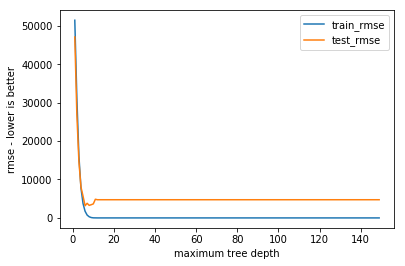

In [39]:
depths = range(1, 150)
train_rmse, test_rmse = [], []
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=10)
    decision_tree.fit(X_train, y_train)
    curr_train_rmse = np.sqrt(
        mean_squared_error(y_train, decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(
        mean_squared_error(y_test, decision_tree.predict(X_test)))
    
    print("Decision Tree Train/Test RMSE:", curr_train_rmse, " ",
          curr_test_rmse)
    
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths, train_rmse, label='train_rmse')
sns.mpl.pyplot.plot(depths, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

Ok. So what we can see from creating a simple decision tree is that this will not be a good model to use for this use case. The RMSE is incredibly high, and the importance of each feature is incredibly low in some case down to the -9th. So let's try and do a random forest model. 

In [56]:
X_sale = house_data_feature_engineered[house_data_engineered_col]
y_sale = house_data_feature_engineered.SalePrice
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_sale, y_sale, test_size=0.4)

#scaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rf)

#transform
X_test_scaled = scaler.transform(X_test_rf)

#pca fit
pca = PCA()

pca.fit(X_train_scaled)

#pca transform 
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#RF regressor model
rf_sale = RandomForestRegressor(n_estimators=400, bootstrap=True,oob_score=True, max_features = None, random_state=1234)
rf_sale.fit(X_train_pca, y_train)
y_pred_rf_sale = rf_sale.predict(X_test_pca)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_sale)))

Random Forest RMSE: 87066.9420414


#Something happened here RMSE is way out of wack 

In [ ]:
#compare the predictions to actual values 
predictions = pd.DataFrame({"Predictions":rf_sale.predict(X_test_pca), "Actual" : y_test})
predictions

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf_sale.predict(X_train_pca)
predicted_test = rf_sale.predict(X_test_pca)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print (test_score)
print (spearman)
#print (pearson)

In [57]:
# list of values to try for n_estimators
estimator_range = range(20,200,20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(
        n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    
    rfreg.fit(X_train_pca, y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    RMSE_scores.append(rmse)

Text(0,0.5,u'RMSE (lower is better)')

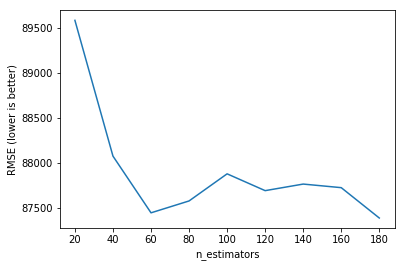

In [58]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [ ]:
# list of values to try for max_features
feature_range = range(1, len(house_data_engineered_col)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train_pca,y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [ ]:
preds

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [ ]:
# compute feature importances
test = pd.DataFrame({
    'feature': house_data_engineered_col,
    'importance': rf_sale.feature_importances_
}).sort_values(
    by='importance', ascending=False)

test.feature.tolist()


Ok so what I'm going to try and do here is read in the test data and use the RF prediction algorithim to predict the sale price in a set of data where I do not have the price of the sale. 

 


In [ ]:
#Read in the test data 
DATA_DIR = os.path.join("..","lol_project_home_pricing", "data")
DATA_DIR = os.path.abspath(DATA_DIR)

In [ ]:
test_house_data  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))


test_house_data_features = test_house_data.columns.get_values()
test_house_data_features = test_house_data_features.tolist()
print (test_house_data_features)

In [ ]:
test_house_data.head()

In [ ]:
#reorder the df so that the data types are cleanly organized 
test_house_mask = pd.DataFrame(test_house_data.dtypes)
test_house_mask = test_house_mask.reset_index()
test_house_mask.columns = ['Col', 'dat_ty']
test_house_mask = test_house_mask.sort_values(['dat_ty'], ascending=[1])
test_house_col = test_house_mask.Col.tolist()
#test_house_col[1:]

In [ ]:
# Replace all the missing categorical data with "missing" creating an additional factor for the model. 
test_house_data_category_filled = test_house_data[test_house_col[37:]].fillna("missing")
test_house_data_category_filled.head()

In [ ]:
# use get_dummies to convert a categorical feature the models can understand 
test_house_data_dummies = pd.get_dummies(test_house_data_category_filled,drop_first=True).astype(int)
test_house_data_dummies.head()

In [ ]:
test_house_mask[:26]

In [ ]:
# replace missing float values with the mean of the rest of the data. 
mean_per_column = test_house_data[test_house_col[26:37]].apply(
    lambda x: x.mean(), axis=0)
mean_per_column = mean_per_column.round(decimals=0)

test_house_data_float_missing = test_house_data[test_house_col[26:37]].fillna(mean_per_column,axis=0)
test_house_data_float_missing.head()

In [ ]:
#Pull out the columns that don't have nulls 
test_house_data_sorted = test_house_data[test_house_col]
test_house_data_nonull = test_house_data_sorted[test_house_col[:26]]

In [ ]:
# Create a new DF by concat the feature engineered df with the non fetaure engineered df
test_house_data_feature_engineered = pd.concat([test_house_data_nonull,test_house_data_float_missing,test_house_data_dummies],axis=1)

In [ ]:
test_house_data_feature_engineered.columns.tolist()

In [ ]:
# Get missing columns in the training test
missing_cols = set( house_data_feature_engineered.columns ) - set( test_house_data_feature_engineered.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_house_data_feature_engineered[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_house_data_feature_engineered = test_house_data_feature_engineered[house_data_feature_engineered.columns]

In [ ]:
test_scaled = scaler.fit_transform(test_house_data_feature_engineered[test_house_data_feature_engineered.columns[1:262]])
test_pca = pca.fit_transform(test_scaled)

In [ ]:
#generate the predictions
RandomForest_predict = rf_sale.predict(test_pca)
predictions = RandomForest_predict.tolist()

predictions = pd.DataFrame(np.array(predictions))

predictions.columns=['Predict_Sale_Price']

predictions.shape


In [ ]:
prediction_csv = pd.concat([test_house_data['Id'],predictions],axis=1)

prediction_csv
